<a href="https://colab.research.google.com/github/Preet1990/Classification_Algos/blob/main/Classification_Algos_6_Log_Reg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


**#Section I : Data Loading**

In [ ]:
# Part I : Load the dataset into the notebook

dataset = pd.read_csv('/content/portu_banking_final.csv')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
dataset.shape

(41188, 21)

In [ ]:
# Part II : Explore and make note of Attribute Information from UCI

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
dataset.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
# Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?
x = dataset.drop(["y"], axis = 1)

x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5


In [ ]:

y = dataset["y"]
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:

value_counts_y = y.count()

value_counts_y

41188

In [ ]:
# Part IV : What is the ratio of the two classes ? Are they balanced ?
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

**# Section II : Data Cleaning**

In [ ]:
# Part I : Get the dtypes of all the columns of our dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
# Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

error_val = dataset.isna().sum()
error_val


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
dataset['age']=dataset['age'].replace(['35-30'],33)
dataset['age']=dataset['age'].replace(['30-35'],33)
dataset['age']=dataset['age'].replace(['25-30'],27)
dataset['age']=dataset['age'].replace(['18-25'],22)
dataset['age']=dataset['age'].replace(['30-32'],31)
dataset['age']=dataset['age'].replace(['50-55'],53)
dataset['age']=dataset['age'].replace(['45-50'],47)
dataset['age']=dataset['age'].replace(['20-25'],23)
dataset['age']=dataset['age'].replace(['20-40'],30)
dataset['age']=dataset['age'].replace(['35-40'],37)
dataset['age']=dataset['age'].replace(['30-40'],35)

dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 33, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 27, '62', '75', '21', '82', '77', 22, 31, '70',
       53, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 47, 23, 30,
       37, '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 45, 24,
       50, 58, 28, 32, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 48, 46, 67,
       38, 34, 54, 40, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

In [ ]:
dataset.age = pd.to_numeric(dataset.age)

dataset.age

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [ ]:
dataset['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [ ]:
from numpy.core.fromnumeric import mean
dataset['marital']=dataset['marital'].replace(['M'],'married')
dataset['marital']=dataset['marital'].replace(['D'],'divorced')
dataset['marital']=dataset['marital'].replace(['S'],'single')
#dataset['marital']=dataset['marital'].replace(['unknowm'],mean(dataset['marital']))

dataset['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
#dataset['marital']=dataset['marital'].replace(['unknown'].mean(), inplace=True )

#dataset['marital']=dataset['marital'].replace(dataset['unknown'].mean())
#dataset['marital'].value_counts()
#dataset_mean = dataset.mean()
#print(dataset_mean)
dataset['marital']=dataset['marital'].replace(['unknown'],'marital')
dataset['marital'].value_counts()

married     24928
single      11568
divorced     4612
marital        80
Name: marital, dtype: int64

#Section III : Exploring data with Group by

In this section , we must create some primitive EDA

Use the groupby function on the mean of the following columns :

I : y

II : job

III : marital

IV : education


Make a note of what you learn from the outputs !

In [ ]:
# I : y
y_data = dataset.groupby(y).mean()
y_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
y,,,,,,,,,,,
0,39.910748,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.0
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0


In [ ]:
# II : job

job_data = dataset.groupby('job').mean()
job_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
ADMIN.,35.000000,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,47.000000,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,36.000000,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,36.000000,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,69.666667,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,37.333333,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,24.500000,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,37.000000,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,52.000000,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


In [ ]:
# III : marital

marital_data = dataset.groupby('marital').mean()
marital_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899176,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
marital,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000
married,42.306844,257.438623,2.57281,967.969753,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158109,261.524378,2.53380,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [ ]:
# IV : education

education_data = dataset.groupby('education').mean()
education_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic-4y,48.916667,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,39.833333,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,44.400000,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,47.592699,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,40.448819,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,39.053190,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


#Section III : Exploratory Data Analysis

Let us put Matplotlib to use !


Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

Part II : Also create stacked bars to same data columns with respect to

Part III : Explore the age column using a histogram and note down your observations

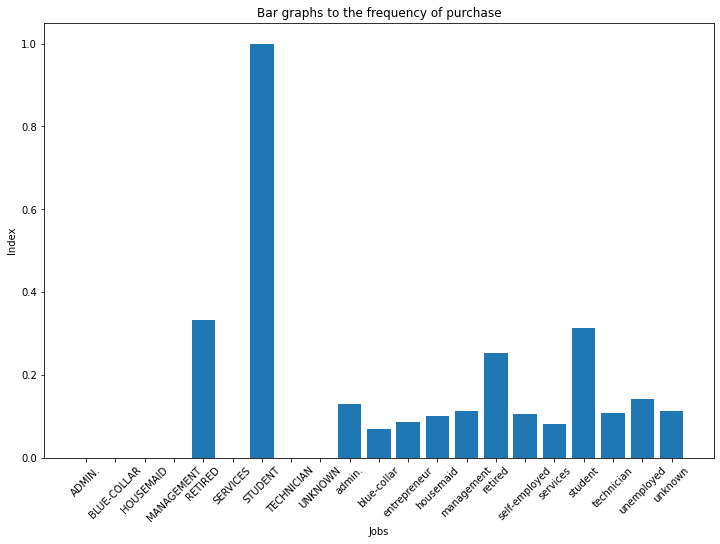

In [ ]:
# Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

def bar_plot():

  #job_data = dataset.groupby('job').mean()
  #job_data
  job_databarplot = dataset.groupby(dataset.job).mean()
  job_databarplot
  x_series = job_databarplot.index
  y_series = job_databarplot['y']
  plt.figure(figsize=(12, 8)) 
  plt.bar(x_series,y_series)
  
  plt.title('Bar graphs to the frequency of purchase')
  plt.xlabel('Jobs')
  plt.ylabel('Index')
  plt.xticks(rotation=45)

  plt.show()
bar_plot()

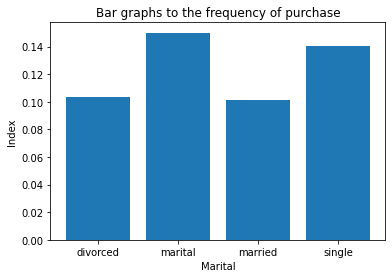

In [ ]:
def bar_plot():

  marital_databarplot = dataset.groupby(dataset.marital).mean()
  marital_databarplot
  x_series = marital_databarplot.index
  y_series = marital_databarplot['y'] 
  plt.bar(x_series,y_series)
  
  plt.title('Bar graphs to the frequency of purchase')
  plt.xlabel('Marital')
  plt.ylabel('Index')
  
  plt.show()
bar_plot()

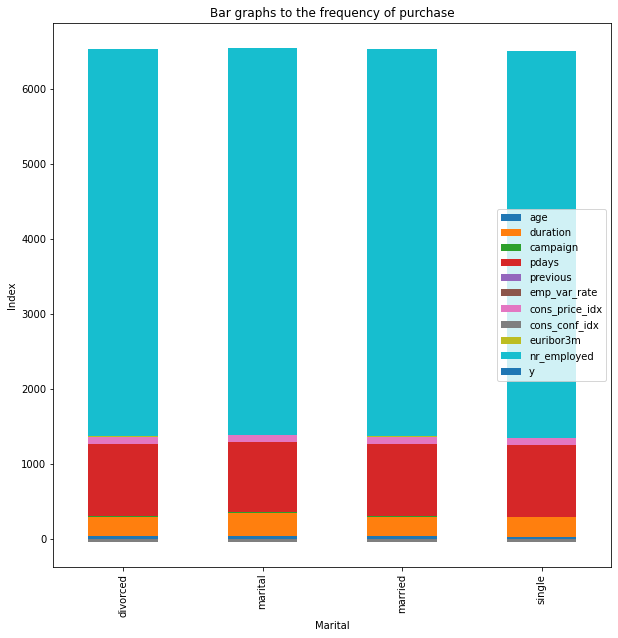

In [ ]:
# Part II : Also create stacked bars to same data columns with respect to

from IPython.core.pylabtools import figsize
import seaborn as sns
def stack_plot():

  marital_datastackplot = dataset.groupby(dataset.marital).mean()
  marital_datastackplot
  x_series = marital_datastackplot.index
  y_series = marital_datastackplot['y'] 
  marital_datastackplot.plot.bar(stacked=True,figsize=(10,10))
  
  plt.title('Bar graphs to the frequency of purchase')
  plt.xlabel('Marital')
  plt.ylabel('Index')
  
  plt.show()
stack_plot()

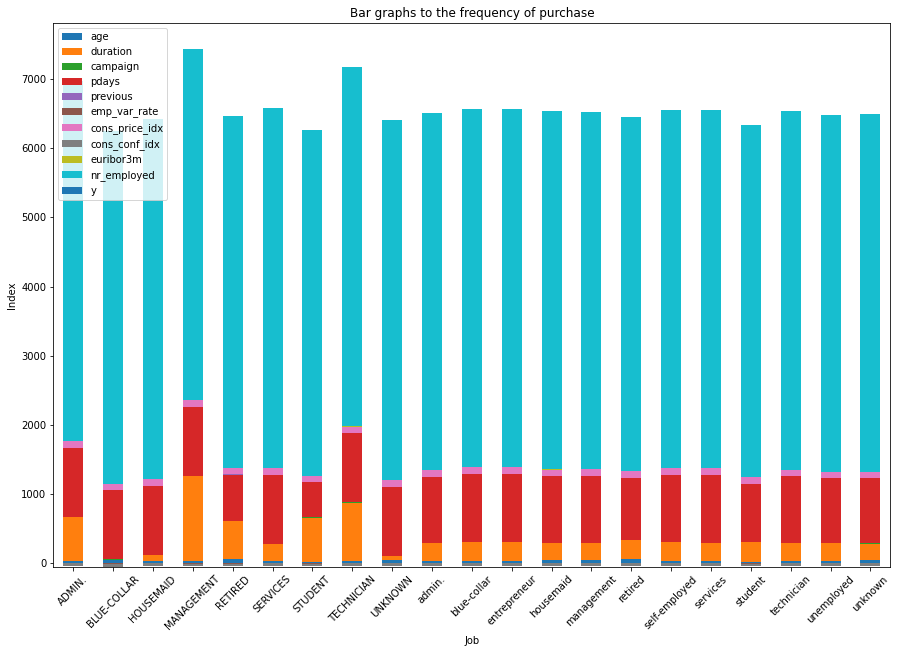

In [ ]:
from IPython.core.pylabtools import figsize
import seaborn as sns
def stack_plot():

  job_datastackplot = dataset.groupby(dataset.job).mean()
  job_datastackplot
  x_series = job_datastackplot.index
  y_series = job_datastackplot['y'] 
  job_datastackplot.plot.bar(stacked=True,figsize=(15,10))
  plt.xticks(rotation=45)
  plt.title('Bar graphs to the frequency of purchase')
  plt.xlabel('Job')
  plt.ylabel('Index')
  
  plt.show()
stack_plot()

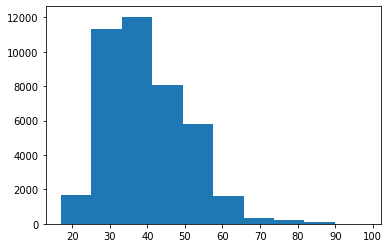

In [ ]:
# Part III : Explore the age column using a histogram and note down your observations

def hist_plot():
  plt.hist(dataset['age'])
  #plt.title()
  plt.show()
hist_plot()  

# Section IV : Categorical Variable Encoding

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data1 = pd.get_dummies(dataset, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [ ]:
data1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_ADMIN.                     41188 non-null  uint8  
 12  job_BLUE-COLLAR                41188 non-null 

In [ ]:
# selecting the independent variables
X = data1.drop(['y'],axis = 1)
x.info()
#data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
Y = data1["y"]


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20)

In [ ]:
 #build a linear regression model
from sklearn.linear_model import LogisticRegression

ln_reg = LogisticRegression()
ln_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# predictions
from sklearn.metrics import classification_report,confusion_matrix

df_pred= ln_reg.predict(X_test)

In [ ]:
#  Model performance by using approapriate diagnostics and measures
print(classification_report(y_test,df_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7288
           1       0.67      0.41      0.51       950

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
confusion_matrix(y_test,df_pred)

array([[7093,  195],
       [ 556,  394]])

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_trainx, sm_trainy =sm.fit_resample(X_train,y_train)

In [ ]:
sm_trainy.value_counts()

0    29260
1    29260
Name: y, dtype: int64

In [ ]:
ln_reg.fit(sm_trainx, sm_trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
df_pred1= ln_reg.predict(X_test)

In [ ]:
print(classification_report(y_test,df_pred1))

              precision    recall  f1-score   support

           0       0.97      0.86      0.92      7288
           1       0.44      0.82      0.57       950

    accuracy                           0.86      8238
   macro avg       0.71      0.84      0.75      8238
weighted avg       0.91      0.86      0.88      8238



In [ ]:
confusion_matrix(y_test,df_pred1)

array([[6302,  986],
       [ 169,  781]])

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(ln_reg, n_features_to_select=None)
rfe = rfe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(rfe.support_)

[False False  True False  True  True False False  True False False False
 False False False False False False False  True  True  True False False
  True False  True  True False False False False False False  True False
 False False  True  True  True False False False False  True  True  True
 False  True  True False False  True False  True  True  True  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True]


In [ ]:
print(rfe.ranking_)

[28 17  1 21  1  1  3  2  1 10 26 37 39 22 25 35 34 30 38  1  1  1 27 18
  1 15  1  1  8 12 16 31 33  7  1 24 32 29  1  1  1  5 19  9  6  1  1  1
 36  1  1 14 13  1 11  1  1  1  1 23  1  1  1  1  1  1 20  4  1  1  1  1
  1  1  1]
